In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dof = 8
zeta = np.array([[0.05] * dof])  # Considering 5% modal damping ratios for all modes
time_step = 0.001
end_time = 100.0  # Simulation time = 100 sec
T = np.arange(0.0, end_time + time_step, time_step)  # Time-Steps Array
X0 = np.zeros(2*dof)  # Initial contidions {Dispalcement = X0[:, 0 : dof], Velocity = X0[:, dof : 2*dof]}
num_time_histories = 10 # Number of time-histories

In [3]:
# Acceleration statistics data of all masses for 2nd, 4th, 6th, 8th, 10th time history and all states
peak_amp = np.zeros((5, 5, 8))
mean = np.zeros((5, 5, 8))
rms = np.zeros((5, 5, 8))
std = np.zeros((5, 5, 8))
skewness = np.zeros((5, 5, 8))
kurtosis = np.zeros((5, 5, 8))

for time_history in range(5):
    for state in range(5):
        acc = pd.read_csv(f"datasets/state{state+1}_datasets/state{state+1}_acceleration_timehistory{time_history*2 +1}.csv", index_col = "Time")
        peak_amp[time_history][state, :] = ((acc.abs()).max()).to_numpy()
        mean[time_history][state, :] = (acc.mean()).to_numpy()
        rms[time_history][state, :] = (((acc**2).mean())**0.5).to_numpy()
        std[time_history][state, :] = (acc.std()).to_numpy()
        skewness[time_history][state, :] = (acc.skew()).to_numpy()
        kurtosis[time_history][state, :] = (acc.kurtosis()).to_numpy()


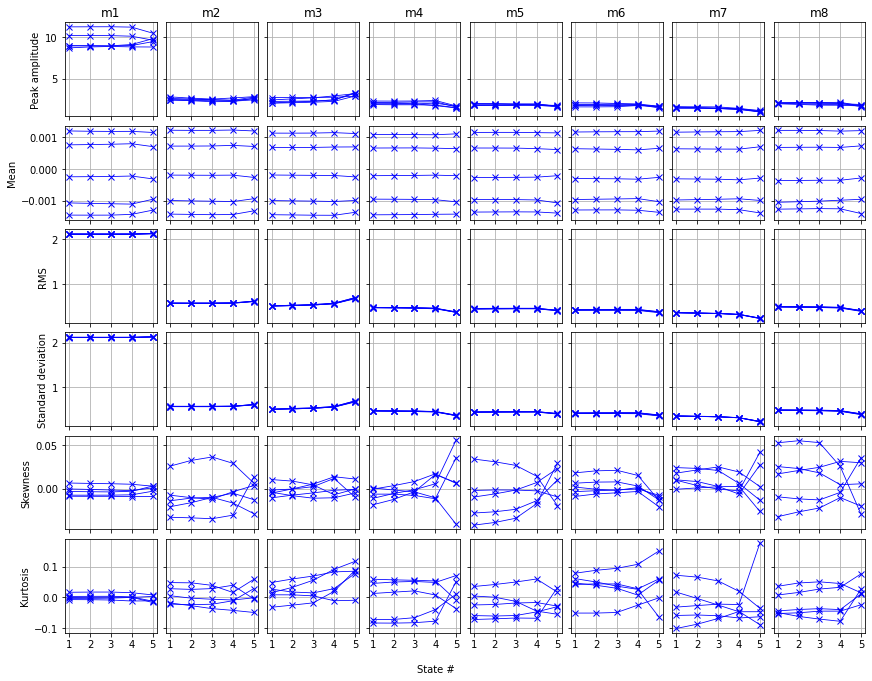

In [13]:
fig = plt.figure(figsize = (16, 12), constrained_layout = True)
ax = fig.subplots(nrows = 6, ncols = 8, sharex = True, sharey = 'row')

fig.text(0.5, -0.03, 'State #', ha='center')

for mass in range(8):
    ax[0][mass].set_title(f"m{mass+1}")

for time_history in range(5):
    # Peak amplitude plot
    ax[0][0].set_ylabel("Peak amplitude")
    for i in range(0, 8):
        ax[0][i].grid(True)
        ax[0][i].set_xticks([1,2,3,4,5])
        ax[0][i].plot([1,2,3,4,5], peak_amp[time_history][:, i], 'x-', label = f"m{i+1}", linewidth = 0.4, color = 'b')

    # Mean plot
    ax[1][0].set_ylabel("Mean")
    for i in range(0, 8):
        ax[1][i].grid(True)
        ax[1][i].set_xticks([1,2,3,4,5])
        ax[1][i].plot([1,2,3,4,5], mean[time_history][:, i], 'x-', label = f"m{i+1}", linewidth = 0.4, color = 'b')

    # RMS plot
    ax[2][0].set_ylabel("RMS")
    for i in range(0, 8):
        ax[2][i].grid(True)
        ax[2][i].set_xticks([1,2,3,4,5])
        ax[2][i].plot([1,2,3,4,5], rms[time_history][:, i], 'x-', label = f"m{i+1}", linewidth = 0.4, color = 'b')

    # STD plot
    ax[3][0].set_ylabel("Standard deviation")
    for i in range(0, 8):
        ax[3][i].grid(True)
        ax[3][i].set_xticks([1,2,3,4,5])
        ax[3][i].plot([1,2,3,4,5], std[time_history][:, i], 'x-', label = f"m{i+1}", linewidth = 0.4, color = 'b')

    # Skewness plot
    ax[4][0].set_ylabel("Skewness")
    for i in range(0, 8):
        ax[4][i].grid(True)
        ax[4][i].set_xticks([1,2,3,4,5])
        ax[4][i].plot([1,2,3,4,5], skewness[time_history][:, i], 'x-', label = f"m{i+1}", linewidth = 0.4, color = 'b')
        
    # Kurtosis plot
    ax[5][0].set_ylabel("Kurtosis")
    for i in range(0, 8):
        ax[5][i].grid(True)
        ax[5][i].set_xticks([1,2,3,4,5])
        ax[5][i].plot([1,2,3,4,5], kurtosis[time_history][:, i], 'x-', label = f"m{i+1}", linewidth = 0.4, color = 'b')
        #ax[5].set_xlabel("State condition #")
        #ax[5].legend(loc='upper center', bbox_to_anchor=(0.5, -0.4), fancybox=True, shadow=True, ncol=7)
